Note: Preparation & Pre Processing menggunakan dataset berikut:
https://www.kaggle.com/datasets/imaditia/indonesia-reading-interest-2020-2023

In [ ]:
!pip install ydata-profiling

In [ ]:
# 1. Mengimpor library
import pandas as pd#Library utama untuk memanipulasi dan menganalisis data.
import numpy as np#Library dasar untuk operasi numerik
import matplotlib.pyplot as plt#Library untuk membuat visualisasi data
import seaborn as sns#Library yang dibangun di atas matplotlib yang lebih baik untuk visualisasi data
from ydata_profiling import ProfileReport # Mengimpor ProfileReport


Dataset berhasil dimuat.
Info Data Awal:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Book                           174 non-null    object 
 1   Author(s)                      174 non-null    object 
 2   Original language              174 non-null    object 
 3   First published                174 non-null    int64  
 4   Approximate sales in millions  174 non-null    float64
 5   Genre                          118 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 8.3+ KB

Lima baris pertama data:
                                       Book                 Author(s)  \
0                      A Tale of Two Cities           Charles Dickens   
1       The Little Prince (Le Petit Prince)  Antoine de Saint-Exupéry   
2  Harry Potter and the Philosopher's Stone             J. K. Rowli

/usr/local/lib/python3.12/dist-packages/ydata_profiling/profile_report.py:524: UserWarning: Ipywidgets is not yet fully supported on Google Colab (https://github.com/googlecolab/colabtools/issues/60).As an alternative, you can use the HTML report. See the documentation for more information.
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

Laporan Data Profiling selesai. Silakan gulir ke atas untuk melihatnya.

Visualisasi 'approximate_sales_histogram.png' disimpan.

Visualisasi 'top_10_genres.png' disimpan.
Visualisasi 'top_10_authors.png' disimpan.
Visualisasi 'box_plot_top_10_years_by_count.png' disimpan.


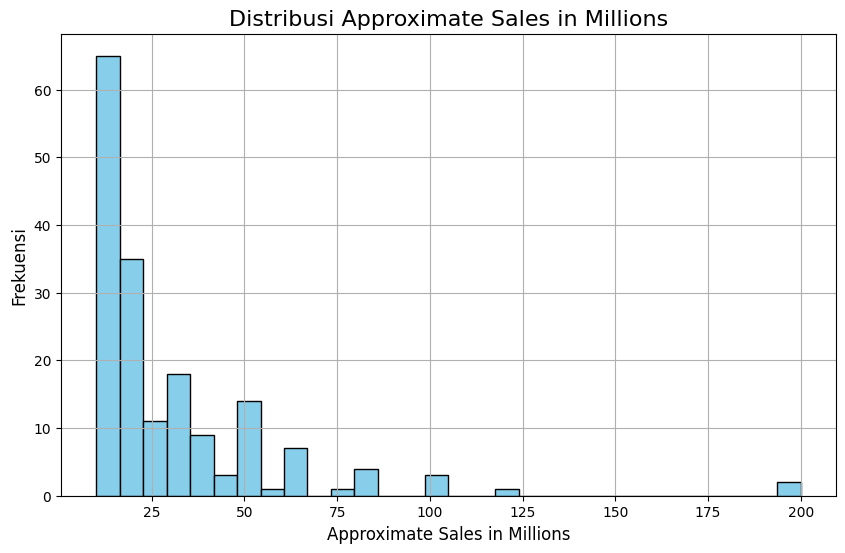

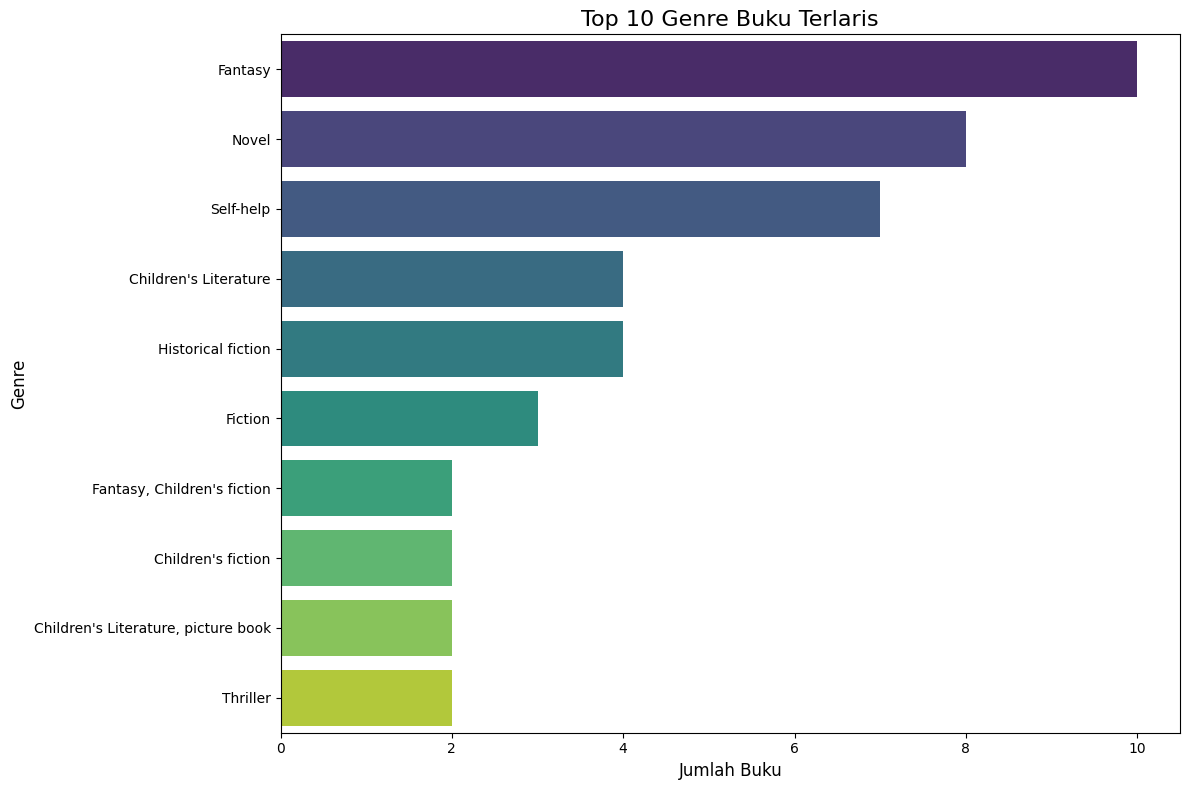

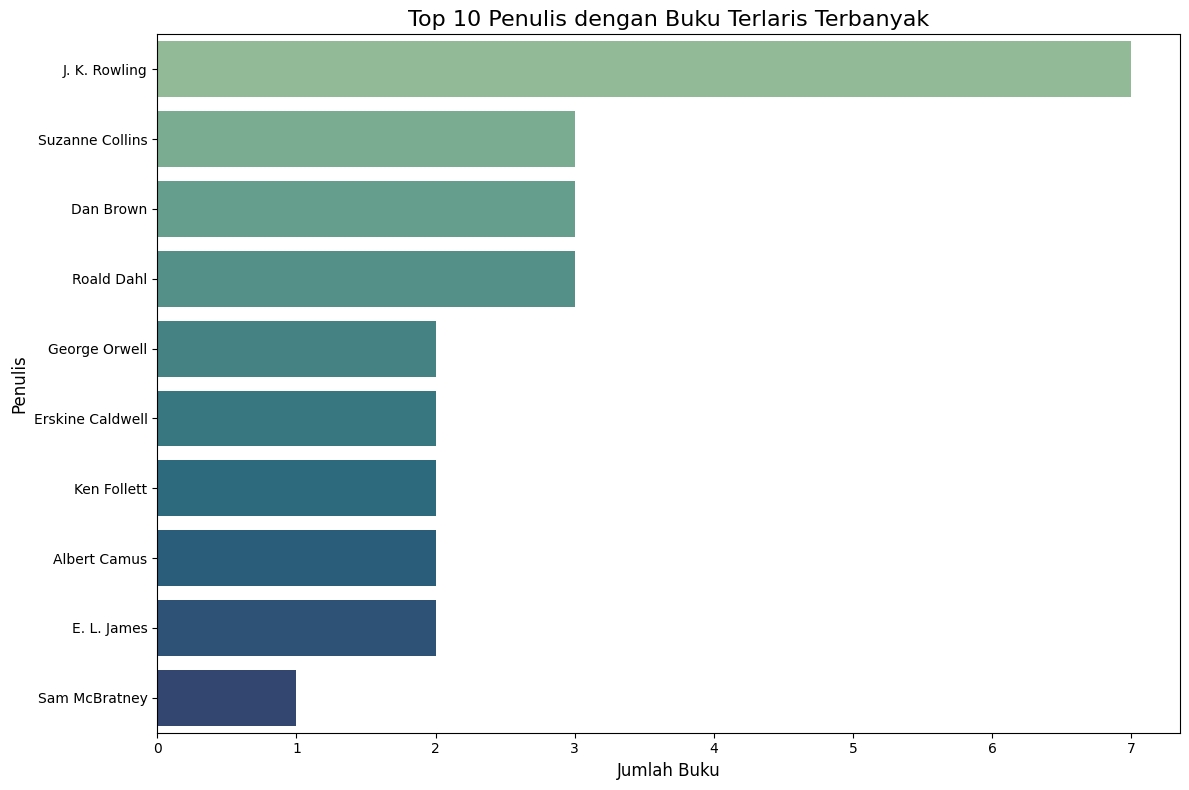

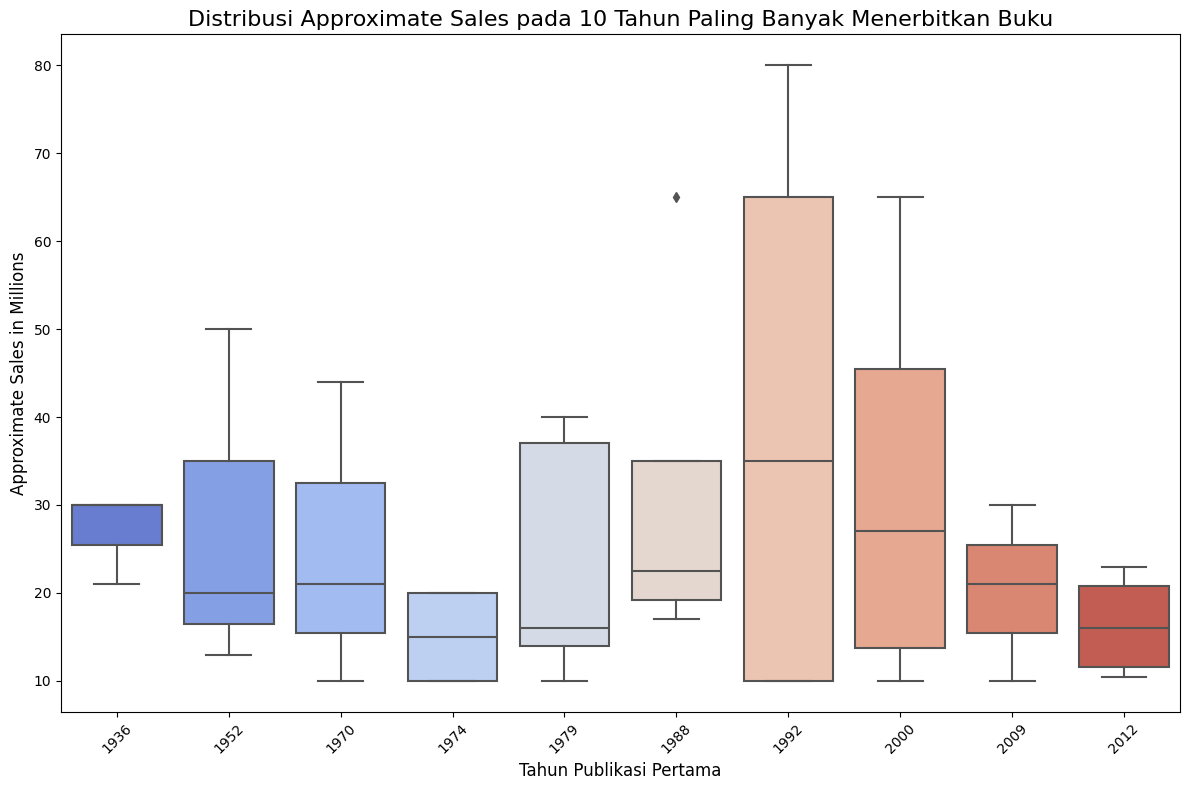

In [ ]:
# --- Langkah 1: Memuat Dataset ---
try:
    df = pd.read_csv("best-selling-books.csv")
    print("\nDataset berhasil dimuat.")
    print("Info Data Awal:")
    df.info()
    print("\nLima baris pertama data:")
    print(df.head())
except FileNotFoundError:
    print("\nERROR: File 'best-selling-books.csv' tidak ditemukan.")
    print("Dipastikan Anda sudah mengunggah file ini ke sesi Google Colab Anda.")
    exit()

# --- Langkah 2: Melakukan Data Profiling ---
print("\nMelakukan Data Profiling (ini mungkin memakan waktu beberapa saat)...")
profile = ProfileReport(df, title="Laporan Profiling Buku Terlaris", explorative=True)
profile.to_widgets()
print("Laporan Data Profiling selesai. Silakan gulir ke atas untuk melihatnya.")

# --- Langkah 3: Visualisasi Data (Setelah Profiling) ---

# Visualisasi 1: Histogram distribusi 'Approximate sales in millions'
plt.figure(figsize=(10, 6))
plt.hist(df['Approximate sales in millions'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('Distribusi Approximate Sales in Millions', fontsize=16)
plt.xlabel('Approximate Sales in Millions', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)
plt.grid(True)
plt.savefig('approximate_sales_histogram.png')
print("\nVisualisasi 'approximate_sales_histogram.png' disimpan.")


# Visualisasi 2: Bar Chart Horisontal untuk Top 10 Genre
# Mengambil 10 genre teratas
top_10_genres = df['Genre'].value_counts().head(10)
plt.figure(figsize=(12, 8)) # Ukuran figure lebih besar untuk label yang panjang
sns.barplot(x=top_10_genres.values, y=top_10_genres.index, palette='viridis') # Menggunakan barplot horisontal
plt.title('Top 10 Genre Buku Terlaris', fontsize=16)
plt.xlabel('Jumlah Buku', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.tight_layout()
plt.savefig('top_10_genres.png')
print("\nVisualisasi 'top_10_genres.png' disimpan.")

# Visualisasi 4: Horizontal Bar Chart untuk Top 10 Penulis
# Mengambil 10 penulis teratas
author_counts = df['Author(s)'].value_counts().head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x=author_counts.values, y=author_counts.index, palette='crest') # Menggunakan barplot horisontal
plt.title('Top 10 Penulis dengan Buku Terlaris Terbanyak', fontsize=16)
plt.xlabel('Jumlah Buku', fontsize=12)
plt.ylabel('Penulis', fontsize=12)
plt.tight_layout()
plt.savefig('top_10_authors.png')
print("Visualisasi 'top_10_authors.png' disimpan.")

# Visualisasi 5: Box Plot untuk Top 10 Tahun Paling Produktif (Opsional, jika ingin melihat distribusi)
# Mengidentifikasi 10 tahun dengan jumlah buku terbanyak
top_10_years_by_count = df['First published'].value_counts().head(10).index
df_top_years_by_count = df[df['First published'].isin(top_10_years_by_count)]

plt.figure(figsize=(12, 8))
# Memastikan tahun diurutkan agar visualisasi rapi
sns.boxplot(x='First published', y='Approximate sales in millions', data=df_top_years_by_count.sort_values('First published'), palette='coolwarm')
plt.title('Distribusi Approximate Sales pada 10 Tahun Paling Banyak Menerbitkan Buku', fontsize=16)
plt.xlabel('Tahun Publikasi Pertama', fontsize=12)
plt.ylabel('Approximate Sales in Millions', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('box_plot_top_10_years_by_count.png')
print("Visualisasi 'box_plot_top_10_years_by_count.png' disimpan.")